In [3]:
setwd("~/Desktop/Tick Research")
install.packages("ggplot2")
library("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [29]:
catbabde <- read.csv("catbabde.csv")
print(catbabde)

   sample     ct  copyn
1      G0 37.497      1
2    G0.5 34.908      5
3      G1 33.548     10
4      G2 30.494    100
5      G3 26.986   1000
6      G4 23.656  10000
7      G5 20.387 100000
8  TS1411 30.795     NA
9  TS7162 31.713     NA
10 TS9716 25.321     NA
11 TS3163 23.417     NA


In [30]:
catbabde$logcopyn <- log10(catbabde$copyn)
print(catbabde)

   sample     ct  copyn logcopyn
1      G0 37.497      1  0.00000
2    G0.5 34.908      5  0.69897
3      G1 33.548     10  1.00000
4      G2 30.494    100  2.00000
5      G3 26.986   1000  3.00000
6      G4 23.656  10000  4.00000
7      G5 20.387 100000  5.00000
8  TS1411 30.795     NA       NA
9  TS7162 31.713     NA       NA
10 TS9716 25.321     NA       NA
11 TS3163 23.417     NA       NA


In [31]:
std <- catbabde[1:7,]
print(std)

  sample     ct  copyn logcopyn
1     G0 37.497      1  0.00000
2   G0.5 34.908      5  0.69897
3     G1 33.548     10  1.00000
4     G2 30.494    100  2.00000
5     G3 26.986   1000  3.00000
6     G4 23.656  10000  4.00000
7     G5 20.387 100000  5.00000


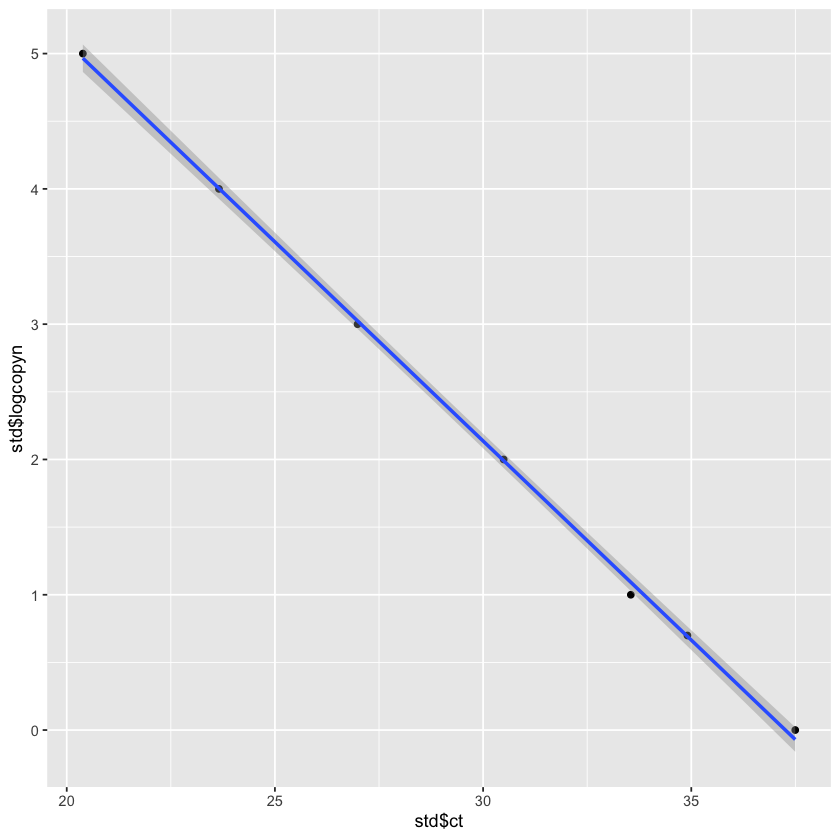

In [32]:
ggplot(std, aes(std$ct, std$logcopyn)) + geom_point() + geom_smooth(method=lm)

In [33]:
bablm1 <- lm(catbabde$ct~catbabde$logcopyn)
summary(bablm1)


Call:
lm(formula = catbabde$ct ~ catbabde$logcopyn)

Residuals:
       1        2        3        4        5        6        7 
 0.24311  0.02726 -0.31068  0.03052 -0.08227 -0.01707  0.10914 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       37.25389    0.11739  317.36 5.90e-12 ***
catbabde$logcopyn -3.39521    0.04169  -81.43 5.29e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1878 on 5 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.9992,	Adjusted R-squared:  0.9991 
F-statistic:  6631 on 1 and 5 DF,  p-value: 5.292e-09


In [34]:
bablm2 <- lm(catbabde$logcopyn~catbabde$ct)
summary(bablm2)


Call:
lm(formula = catbabde$logcopyn ~ catbabde$ct)

Residuals:
        1         2         3         4         5         6         7 
 0.069860  0.006859 -0.092374  0.008800 -0.023643 -0.003699  0.034198 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.965923   0.109141  100.47 1.85e-09 ***
catbabde$ct -0.294311   0.003614  -81.43 5.29e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05528 on 5 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.9992,	Adjusted R-squared:  0.9991 
F-statistic:  6631 on 1 and 5 DF,  p-value: 5.292e-09


In [35]:
catbabde$logpredict <- predict.lm(bablm2, catbabde)


In [36]:
catbabde$copynpredict <- 10^(catbabde$logpredict)
print(catbabde)

   sample     ct  copyn logcopyn  logpredict copynpredict
1      G0 37.497      1  0.00000 -0.06986043 8.514116e-01
2    G0.5 34.908      5  0.69897  0.69211099 4.921653e+00
3      G1 33.548     10  1.00000  1.09237408 1.237012e+01
4      G2 30.494    100  2.00000  1.99120015 9.799415e+01
5      G3 26.986   1000  3.00000  3.02364346 1.055950e+03
6      G4 23.656  10000  4.00000  4.00369940 1.008555e+04
7      G5 20.387 100000  5.00000  4.96580236 9.242774e+04
8  TS1411 30.795     NA       NA  1.90261251 7.991209e+01
9  TS7162 31.713     NA       NA  1.63243493 4.289779e+01
10 TS9716 25.321     NA       NA  3.51367143 3.263408e+03
11 TS3163 23.417     NA       NA  4.07403975 1.185877e+04


In [37]:
babcopynparasit <- read.csv("Bab_copyn_parasit.csv")
print(babcopynparasit)

   copynumber parasitemia
1    1.19e+03        0.20
2    4.12e+02        0.10
3    9.70e+02        0.10
4    2.54e+04        2.00
5    1.59e+05        5.00
6    3.43e+04        0.85
7    3.76e+04        2.00
8    2.19e+05        4.30
9    9.66e+02        0.10
10   8.68e+03        0.20
11   1.18e+04        0.80
12   6.03e+03        0.65
13   9.51e+03        0.50
14   1.69e+00        1.15
15   1.36e+04        0.10
16   2.77e+04        1.10
17   6.95e+04        3.40
18   2.00e+03        1.15
19   3.32e+04        3.80
20   4.57e+04        0.60
21   1.07e+05        1.70


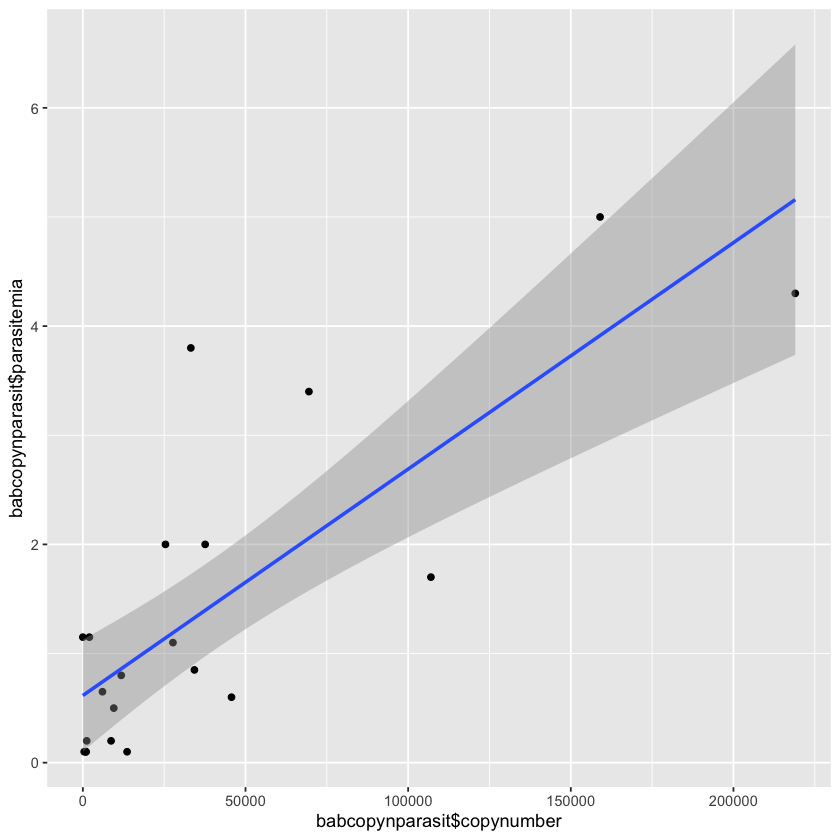

In [20]:
ggplot(babcopynparasit, aes(babcopynparasit$copynumber, babcopynparasit$parasitemia)) + geom_point() + geom_smooth(method=lm)